In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('train_HP.csv')

In [ ]:
dataset.head()

In [ ]:
def getNanColNames(df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

In [ ]:
cols_con_nan = getNanColNames(dataset)
cols_con_nan

In [ ]:
dataset[cols_con_nan].dtypes

In [ ]:
dataset[cols_con_nan].isnull().mean()

In [ ]:
def getNanGoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables

In [ ]:
cols_cca = getNanGoodColsNames(dataset, 0.05)
cols_cca

In [ ]:
dataset_temp = dataset[cols_cca].dropna()

In [ ]:
dataset_temp.shape, dataset.shape

In [ ]:
meanValue = np.round(dataset['LotFrontage'].mean(), 0)
medianValue = np.round(dataset['LotFrontage'].median(), 0)

In [ ]:
meanValue

In [ ]:
medianValue

In [ ]:
dataset_FL_meanImp = dataset['LotFrontage'].fillna(meanValue)

In [ ]:
dataset_FL_medianImp = dataset['LotFrontage'].fillna(medianValue)

In [ ]:
np.corrcoef(dataset_FL_meanImp, dataset['SalePrice'])[0,1]

In [ ]:
np.corrcoef(dataset_FL_medianImp, dataset['SalePrice'])

In [ ]:
dataset['LotFrontage'].isnull().sum()

In [ ]:
dataset_cat_missing = dataset[['BsmtQual', 'FireplaceQu', 'SalePrice']]

In [ ]:
dataset_cat_missing.head()

In [ ]:
dataset_cat_missing.isnull().sum()

In [ ]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

In [ ]:
dataset_cat_missing['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("BsmtQual")
plt.show()

In [ ]:
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['BsmtQual']
sns.boxplot(x=bsq, y=sales)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
ax.legend()
plt.show()

In [32]:
dataset_cat_missing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
dataset_cat_missing['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("FireplaceQu")
plt.show()

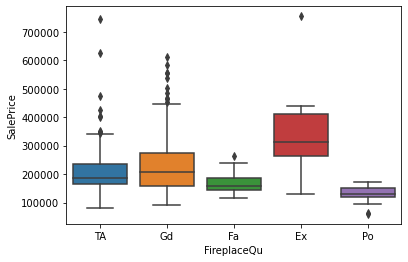

In [33]:
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['FireplaceQu']
sns.boxplot(x=bsq, y=sales)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po']['SalePrice'].plot(kind="kde", color="blue", label="Fa")
ax.legend()
plt.show()

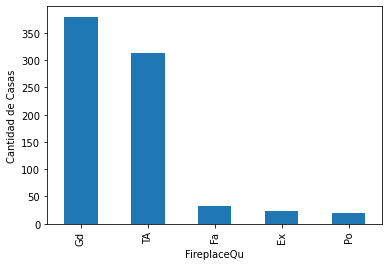

In [34]:
dataset_cat_missing['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("FireplaceQu")
plt.show()

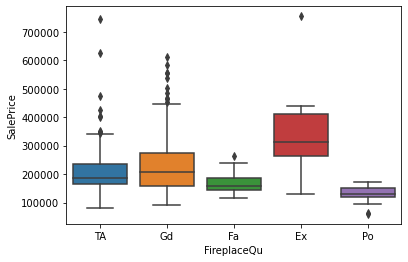

In [35]:
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['FireplaceQu']
sns.boxplot(x=bsq, y=sales)
plt.show()

In [37]:
def getCategoryVars(df):
    colnames = df.columns
    cat_cols = []
    for col in colnames:
        if(df[col].dtype == 'object'):
            cat_cols.append(col)
    return cat_cols

In [38]:
cat_cols = getCategoryVars(dataset)

In [39]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [40]:
cat_cols.append('SalePrice')

In [41]:
dataset_categorics = dataset[cat_cols]

In [42]:
dataset_cat = dataset_categorics

In [43]:
dataset_categorics.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [44]:
dataset_categorics['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [45]:
pd.get_dummies(dataset_cat['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [46]:
pd.get_dummies(dataset_categorics)

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,181500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,223500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,140000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,250000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,210000,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,266500,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,142125,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [48]:
freq_mapper = (dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [49]:
density_mapper = (dataset_categorics['KitchenQual'].value_counts().sort_values(ascending=False)/len(dataset_categorics['KitchenQual'])).to_dict()
density_mapper

{'TA': 0.5034246575342466,
 'Gd': 0.40136986301369865,
 'Ex': 0.0684931506849315,
 'Fa': 0.02671232876712329}

In [50]:
dataset = pd.read_csv('train_HP.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
def executeFreqEncoding(df, map_type='freq'):
    colnames = df.columns
    for col in colnames:
        if(df[col].dtype == 'object'):
            factor_div = 1 if (map_type == 'freq') else len(df[col])
            mapper = (df[col].value_counts().sort_values(ascending=False)/factor_div).to_dict()
            df[col] = df[col].map(mapper) 

In [52]:
dataset_temp = dataset

In [53]:
executeFreqEncoding(dataset_temp)

In [54]:
dataset_temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151.0,65.0,8450,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2008,1267.0,1198.0,208500
1,2,20,1151.0,80.0,9600,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,5,2007,1267.0,1198.0,181500
2,3,60,1151.0,68.0,11250,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,9,2008,1267.0,1198.0,223500
3,4,70,1151.0,60.0,9550,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2006,1267.0,101.0,140000
4,5,60,1151.0,84.0,14260,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,12,2008,1267.0,1198.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1151.0,62.0,7917,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,8,2007,1267.0,1198.0,175000
1456,1457,20,1151.0,85.0,13175,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,157.0,NaN,0,2,2010,1267.0,1198.0,210000
1457,1458,70,1151.0,66.0,9042,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,59.0,49.0,2500,5,2010,1267.0,1198.0,266500
1458,1459,20,1151.0,68.0,9717,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,4,2010,1267.0,1198.0,142125


In [55]:
import scipy.stats as stats

In [56]:
len(dataset['LotArea'].unique())

1073

In [57]:
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [58]:
numeric_cont_vars = getContinuesCols(dataset)
numeric_cont_vars

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [59]:
def plot_density_variable(df, variable):
    
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    
    plt.subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
for col in numeric_cont_vars:
        plot_density_variable(dataset, col)

In [61]:
dataset_temp = dataset.loc[:, ['LotArea', 'SalePrice']]
dataset_temp.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [ ]:
plot_density_variable(dataset, 'LotArea')

In [63]:
dataset_temp['LotArea_log'] = np.log(dataset['LotArea'])

In [64]:
dataset_temp.head()

,LotArea,SalePrice,LotArea_log
0,8450,208500,9.041922
1,9600,181500,9.169518
2,11250,223500,9.328123
3,9550,140000,9.164296
4,14260,250000,9.565214


In [ ]:
plot_density_variable(dataset_temp, 'LotArea_log')

In [66]:
np.corrcoef(dataset_temp['LotArea_log'], dataset_temp['SalePrice'])[0, 1]

0.3885202679345966

In [72]:
dataset_temp['LotArea_quadratic'] = (dataset['LotArea'])

In [ ]:
plot_density_variable(dataset_temp, 'LotArea_quadratic')

In [74]:
np.corrcoef(dataset_temp['LotArea_quadratic'], dataset_temp['SalePrice'])[0, 1]

0.26384335387140573

In [67]:
dataset_temp['LotArea_inv'] = (1 / dataset['LotArea'])

In [ ]:
plot_density_variable(dataset_temp, 'LotArea_inv')

In [69]:
np.corrcoef(dataset_temp['LotArea_inv'], dataset_temp['SalePrice'])[0, 1]

-0.29507440361064213

In [75]:
import scipy.stats as stats

In [76]:
dataset_temp['LotArea_boxCox'], lambdaX = stats.boxcox(dataset_temp['LotArea'])

In [ ]:
plot_density_variable(dataset_temp, 'LotArea_boxCox')

In [78]:
np.corrcoef(dataset_temp['LotArea_boxCox'], dataset_temp['SalePrice'])[0, 1]

0.38951441164829076

In [79]:
dataset_temp['LotArea_YJ'], lambdaX = stats.yeojohnson(dataset_temp['LotArea'])

In [ ]:
plot_density_variable(dataset_temp, 'LotArea_YJ')

In [80]:
np.corrcoef(dataset_temp['LotArea_YJ'], dataset_temp['SalePrice'])[0, 1]

0.38951784271282075

In [81]:
def inspect_outliers(df, variable):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(131)
    sns.distplot(df[variable], bins=30)
    plt.title("Densisd-Histograma: " + col)
    
    plt.subplot(132)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title("QQ-Plot: " + col)
    
    plt.subplot(133)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot: " + col)
    
    plt.show()

In [ ]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [83]:
numeric_cont_vars

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [84]:
def detect_outliers(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)
    
    return LI, LS

In [85]:
detect_outliers(dataset, 'GrLivArea', 1.75)

(-3.1875, 2909.4375)

In [86]:
factor = 1.75

In [87]:
IQR = dataset['LotFrontage'].quantile(0.75) - dataset['LotFrontage'].quantile(0.25)
LI = dataset['LotFrontage'].quantile(0.25) - (IQR*factor)
LS = dataset['LotFrontage'].quantile(0.75) + (IQR*factor)

In [88]:
IQR

21.0

In [89]:
LI

22.25

In [90]:
LS

116.75

In [91]:
temp = dataset[((dataset['LotFrontage'] >= LI) & (dataset['LotFrontage'] <= LS))]
temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1151.0,65.0,8450,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2008,1267.0,1198.0,208500
1,2,20,1151.0,80.0,9600,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,5,2007,1267.0,1198.0,181500
2,3,60,1151.0,68.0,11250,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,9,2008,1267.0,1198.0,223500
3,4,70,1151.0,60.0,9550,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,2,2006,1267.0,101.0,140000
4,5,60,1151.0,84.0,14260,1454.0,NaN,484.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,12,2008,1267.0,1198.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1151.0,62.0,7917,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,8,2007,1267.0,1198.0,175000
1456,1457,20,1151.0,85.0,13175,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,157.0,NaN,0,2,2010,1267.0,1198.0,210000
1457,1458,70,1151.0,66.0,9042,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,59.0,49.0,2500,5,2010,1267.0,1198.0,266500
1458,1459,20,1151.0,68.0,9717,1454.0,NaN,925.0,1311.0,1459.0,...,0,NaN,NaN,NaN,0,4,2010,1267.0,1198.0,142125


In [92]:
1 - len(temp)/len(dataset)

0.21986301369863015

In [93]:
dataset_temp = dataset

In [94]:
limites = detect_outliers(dataset_temp, 'LotFrontage', 1.75)
LF_LI, LF_LS = limites

In [95]:
dataset_temp['LotFrontage_cap'] = np.where(dataset_temp['LotFrontage'] > LF_LS, LF_LS,
                                          np.where(dataset_temp['LotFrontage'] < LF_LI, LF_LI, dataset_temp['LotFrontage'])) 

In [ ]:
inspect_outliers(dataset_temp, 'LotFrontage_cap')

In [ ]:
inspect_outliers(dataset_temp, 'LotFrontage')

In [97]:
def outlier_treatment(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)
    
    df[variable] = np.where(df[variable] > LS, LS,
                                          np.where(df[variable] < LI, LI, df[variable])) 

In [ ]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [ ]:
for col in numeric_cont_vars:
    outlier_treatment(dataset, col, 1.75)

In [ ]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
dataset_temp = dataset.loc[:, numeric_cont_vars]

In [106]:
dataset_temp.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


In [107]:
scaler = StandardScaler()
scaler.fit(dataset_temp)

StandardScaler()

In [108]:
dataset_temp_scaled = pd.DataFrame(scaler.transform(dataset_temp), columns=dataset_temp.columns)

In [109]:
np.round(dataset_temp_scaled.describe(), 2)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-2.02,-0.92,-3.29,-1.69,-0.57,-0.97,-0.29,-1.28,-2.41,-2.14,-0.80,-2.25,-3.18,-2.21,-0.75,-0.70,-0.36,-0.27,-1.84
25%,-0.87,-0.46,-0.30,-0.57,-0.87,-0.57,-0.97,-0.29,-0.78,-0.60,-0.73,-0.80,-0.73,-0.71,-0.65,-0.75,-0.70,-0.36,-0.27,-0.64
50%,0.00,-0.04,-0.10,0.06,0.44,-0.57,-0.13,-0.29,-0.20,-0.15,-0.20,-0.80,-0.10,0.06,0.03,-0.75,-0.33,-0.36,-0.27,-0.23
75%,0.87,0.41,0.11,0.95,0.93,0.34,0.59,-0.29,0.55,0.55,0.59,0.87,0.50,0.95,0.48,0.59,0.32,-0.36,-0.27,0.42
max,1.73,10.01,20.52,1.28,1.22,8.27,11.41,8.85,4.00,11.52,9.13,3.94,7.86,1.28,4.42,6.09,7.55,8.68,8.34,7.23


In [113]:
dataset_temp_scaled.to_csv('datalab.csv')